In [1]:
import os, sys
import pygeostat as gs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

exe_dir="../pygeostat/executable/"

In [2]:
gs.get_executable(source='GSLIB')

The software is available under gslib license agreement (http://www.gslib.com)


In [3]:
# Setting the cat dictionary
gs.Parameters['data.catdict'] = {1: 'Inside', 0: 'Outside'}
gs.Parameters.describe('data.catdict')

data.catdict:
When initializing a DataFile, this dictionary will be used as DataFile.catdict (if catdict.keys() matches DataFile.cat codes). This dictionary is formaatted as {catcodes: catnames}.


In [4]:
gs.Parameters['data.griddef'] = gs.GridDef('''
120 5.0 10.0 
110 1205.0 10.0 
1 0.5 1.0''')
print(gs.Parameters['data.griddef'])
gs.Parameters.describe('data.griddef')

120 5.0 10.0 
110 1205.0 10.0 
1 0.5 1.0
data.griddef:
When initializing a DataFile, this will be used as DataFile.GridDef if GridDef.count() matches DataFile.shape[0]. A pygeostat.GridDef object or valid gridstr/gridarr may be used for intitialization.


In [5]:
datafl = gs.ExampleData('oilsands')
datafl.head()

,Drillhole Number,East,North,Elevation,Bitumen,Fines,Chlorides,Facies Code
0,2.0,1245.0,10687.09,257.5,7.378,28.784,-9.0,-9.0
1,2.0,1245.0,10687.09,254.5,9.176,22.897,-9.0,-9.0
2,2.0,1245.0,10687.09,251.5,11.543,15.144,-9.0,-9.0
3,2.0,1245.0,10687.09,248.5,6.808,30.598,-9.0,-9.0
4,2.0,1245.0,10687.09,245.5,10.657,18.011,-9.0,-9.0


In [6]:
datafl.describe()

,Bitumen,Fines,Chlorides
count,5808.000000,5808.000000,5808.000000
mean,7.708852,28.707298,103.139353
std,5.136709,21.247085,286.545409
min,0.000000,0.861000,-9.000000
25%,2.877750,10.166000,-9.000000
50%,7.480000,24.453000,5.400000
75%,12.666000,42.823250,63.900000
max,18.428000,86.777000,2602.000000


In [7]:
out_dir = 'Output'
gs.mkdir(out_dir)

outgslibfl = os.path.join(out_dir,'oilsands_out.dat')
outcsvfl = os.path.join(out_dir,'oilsands_out.csv')
outhdf5fl = os.path.join(out_dir,'oilsands_out.hdf5')

print('\nThe datafile can be saved as a GSLIB file:',outgslibfl)
datafl.write_file(flname=outgslibfl, fltype='GSLIB')

print('\nOr as a hdf5 file which can be opened by Excel')
print('A subset of columns, can be saved with any of these modes - just saving X, Y and Z for example:',outhdf5fl)
datafl.write_file(flname=outhdf5fl, variables=['East','North','Elevation'])

print('\nOr as a CSV file which can be opened by Excel')
print('A subset of columns, can be saved with any of these modes - just saving X, Y and Z for example:',outcsvfl)
datafl.write_file(flname=outcsvfl, variables=['East','North','Elevation'], fltype='CSV')


The datafile can be saved as a GSLIB file: Output\oilsands_out.dat

Or as a hdf5 file which can be opened by Excel
A subset of columns, can be saved with any of these modes - just saving X, Y and Z for example: Output\oilsands_out.hdf5

Or as a CSV file which can be opened by Excel
A subset of columns, can be saved with any of these modes - just saving X, Y and Z for example: Output\oilsands_out.csv


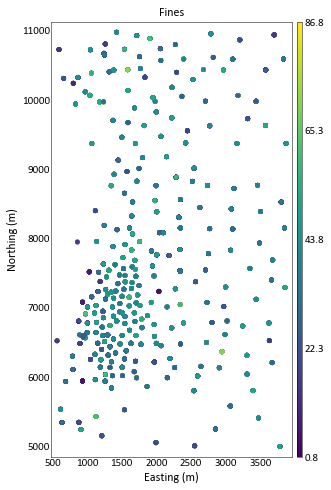

In [8]:
datafl = gs.DataFile(outgslibfl)
gs.location_plot(datafl, var='Fines')

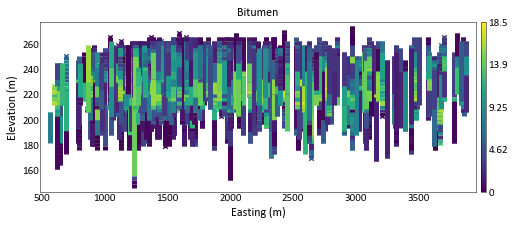

In [9]:
gs.location_plot(datafl, var='Bitumen', orient='xz', aspect = 10)

In [10]:
datafl.spacing(n_nearest=5)
datafl.head()

,Drillhole Number,East,North,Elevation,Bitumen,Fines,Chlorides,Facies Code,Data Spacing (m)
0,2.0,1245.0,10687.09,257.5,7.378,28.784,-9.0,-9.0,184.486903
1,2.0,1245.0,10687.09,254.5,9.176,22.897,-9.0,-9.0,184.486903
2,2.0,1245.0,10687.09,251.5,11.543,15.144,-9.0,-9.0,184.486903
3,2.0,1245.0,10687.09,248.5,6.808,30.598,-9.0,-9.0,184.486903
4,2.0,1245.0,10687.09,245.5,10.657,18.011,-9.0,-9.0,184.486903


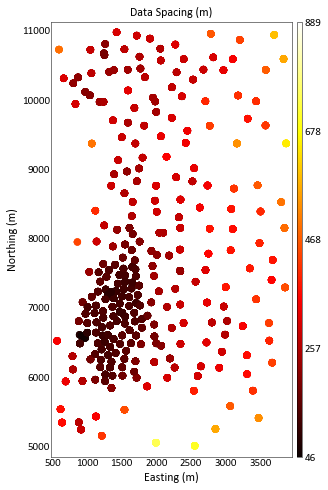

In [11]:
gs.location_plot(datafl, var='Data Spacing (m)', s=50, cmap='hot')


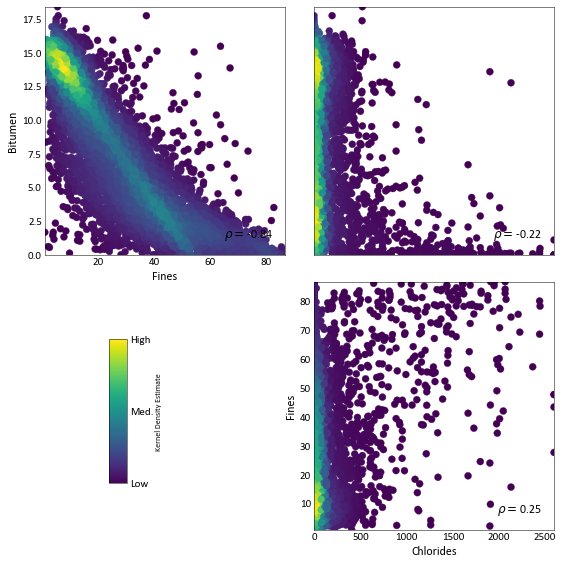

In [12]:
_ = gs.scatter_plots(datafl)

In [13]:
gridstr = '''40  0.5  1    -nx, xmin, xsize
40  0.5  1    -ny, ymin, ysize
40  0.5  1    -nz, zmin, zsize'''
griddef = gs.GridDef(grid_str=gridstr)
krigfl = gs.ExampleData('3d_grid', griddef=griddef)
krigfl.describe()

count    64000.000000
mean         0.021495
std          0.989562
min         -4.050000
25%         -0.666000
50%          0.010000
75%          0.686000
max          3.870000
Name: value, dtype: float64

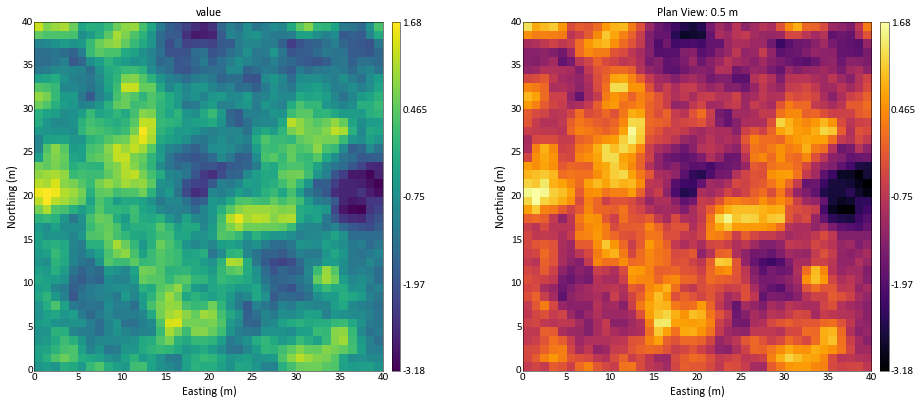

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
plt.subplots_adjust(wspace=0.4)
gs.slice_plot(krigfl, cbar=True, ax=ax1)
gs.slice_plot(krigfl.data['value'], griddef, cbar=True, ax=ax2, cmap='inferno')

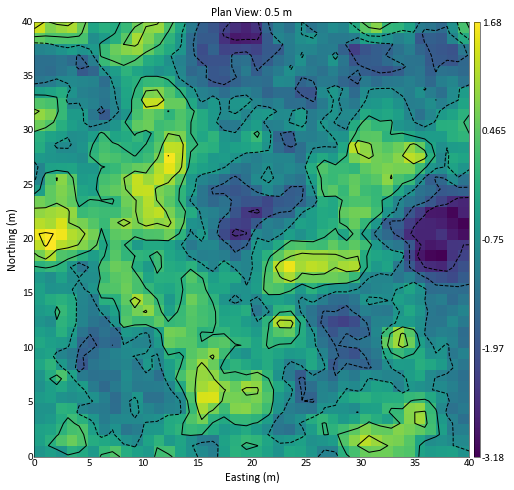

In [15]:
ax = gs.slice_plot(krigfl.data['value'],griddef)
_ = gs.contour_plot(krigfl.data['value'],griddef,ax=ax)

In [16]:
kt3dn = gs.Program(program='kt3d', getpar=True)

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!
D:\00_Guidelines\17_Introduction_Geostatistics_Training\Example\tmpfmik4pug\kt3d.par has been copied to the clipboard


In [17]:
# use pygeosta to infer grid definition
datafl.infergriddef(blksize=[100,100,10])

Pygeostat GridDef:
34 612.0 100.0 
60 5055.0 100.0 
14 146.0 10.0

In [18]:
parstr = """                  Parameters for KT3D
                  *******************

START OF PARAMETERS:
{flname}                         -file with data
{cols}  0                        -   columns for DH,X,Y,Z,var,sec var
-1.0e21   1.0e21                 -   trimming limits
0                                -option: 0=grid, 1=cross, 2=jackknife
xvk.dat                          -file with jackknife data
1   2   0    3    0              -   columns for X,Y,Z,vr and sec var
3                                -debugging level: 0,1,2,3
kt3d.dbg                         -file for debugging output
{outfl}                          -file for kriged output
{griddef}
1    1      1                    -x,y and z block discretization
4   40                           -min, max data for kriging
0                                -max per octant (0-> not used)
8000.0  8000.0  400.0            -maximum search radii
 0.0   0.0   0.0                 -angles for search ellipsoid
1     2.302                      -0=SK,1=OK,2=non-st SK,3=exdrift
0 0 0 0 0 0 0 0 0                -drift: x,y,z,xx,yy,zz,xy,xz,zy
0                                -0, variable; 1, estimate trend
extdrift.dat                     -gridded file with drift/mean
4                                -  column number in gridded file
2    0.0                      -nst, nugget effect
1    0.25  0.0   0.0   0.0    -it,cc,ang1,ang2,ang3
        400.0  300.0  25.0    -a_hmax, a_hmin, a_vert
1    0.75  0.0   0.0   0.0    -it,cc,ang1,ang2,ang3
      800.0 450.0  30.0    -a_hmax, a_hmin, a_vert
"""

In [19]:
griddef = datafl.griddef

kriging_output = os.path.join(out_dir, 'kt3d.out')

kt3dnpars ={'flname':datafl.flname,
            'griddef':griddef,
            'outfl': kriging_output,
            'cols':datafl.gscol([datafl.dh]+datafl.xyz + ['Bitumen'])}
print('Note that the string representation of columns can be returned using the GSCOL function for a list of variables:',
      kt3dnpars['cols'])

kt3dn.run(parstr=parstr.format(**kt3dnpars))

Note that the string representation of columns can be returned using the GSCOL function for a list of variables: 1 2 3 4 5
Calling:  ['C:\\Users\\12004603\\AppData\\Local\\Continuum\\rms-python\\lib\\site-packages\\pygeostat\\executable\\kt3d', 'temp']

KT3D Version: 2.907

 data file = Output\oilsands_out.dat                 
 columns =           1           2           3           4           5
          0
 trimming limits =   -1.000000E+21    1.000000E+21
 kriging option =           0
 jackknife data file = xvk.dat                                 
 columns =           1           2           0           3           0
 debugging level =           3
 debugging file = kt3d.dbg                                
 output file = Output\kt3d.out                         
 nx, xmn, xsiz =          34      612.000000      100.000000
 ny, ymn, ysiz =          60     5055.000000      100.000000
 nz, zmn, zsiz =          14      146.000000       10.000000
 block discretization:          1          

In [20]:
krigfl = gs.DataFile(kriging_output, griddef=datafl.griddef)
krigfl.head()

,Estimate,EstimationVariance
0,2.984330,1.138133
1,3.692389,1.142133
2,3.785876,1.158344
3,3.422367,1.166209
4,3.216756,1.158588


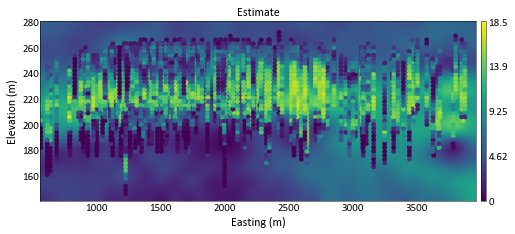

In [21]:
gs.slice_plot(krigfl, var='Estimate', orient='xz', pointdata=datafl, pointvar='Bitumen', aspect = 10)

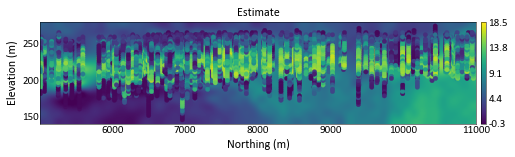

In [22]:
gs.slice_plot(krigfl, var='Estimate', orient='yz', pointdata=datafl, pointvar='Bitumen', aspect = 10)

In [23]:
# Clean up
try:
    gs.rmfile('temp')
    gs.rmfile('kt3dn.dbg')
    gs.rmdir(out_dir) #command to delete generated data file
except:
    pass